In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
House_DF = pd.read_csv('USA_Housing.csv')

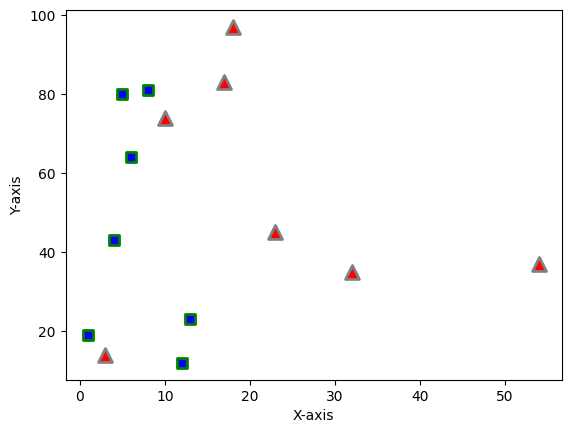

In [8]:
x1 = [5,1,12,4,13,6,8]
y1 = [80,19,12,43,23,64,81]
x2 = [17,23,54,32,3,18,10]
y2 = [83,45,37,35,14,97,74]
plt.scatter(x1, y1, c = 'blue', linewidth = 2, marker = 's', edgecolor = 'green', s = 50)
plt.scatter(x2, y2, c = 'red', linewidth = 2, marker = '^', edgecolor = 'grey', s = 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

<ipython-input-22-d712f133aa55>:14: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, interval = 500, blit = True)


RuntimeError: The animation function must return a sequence of Artist objects.

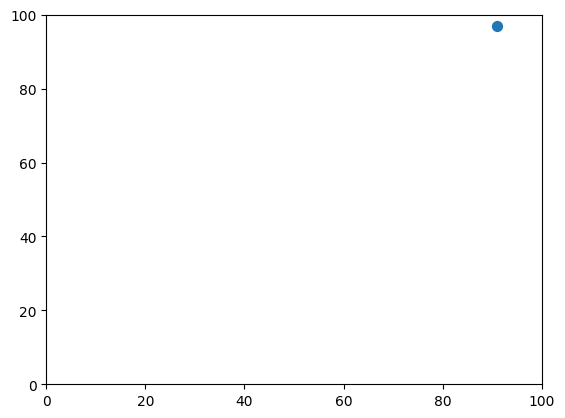

In [22]:
import matplotlib.animation as animation
import random

fig, ax = plt.subplots()
sc = ax.scatter([], [], s = 50)
plt.xlim(0, 100)
plt.ylim(0, 100)
x_data, y_data = [] , []
def update(frame):
  x_data.append(random.randint(0, 100))
  y_data.append(random.randint(0, 100))
  sc.set_offsets(np.column_stack((x_data, y_data)))
  return sc
ani = animation.FuncAnimation(fig, update, interval = 500, blit = True)
plt.show()

In [33]:
x= House_DF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
'Avg. Area Number of Bedrooms', 'Area Population']]
y=House_DF['Price']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=101)

In [38]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1303,68091.179676,5.364208,7.502956,3.10,44557.379656
1051,75729.765546,5.580599,7.642973,4.21,29996.018448
4904,70885.420819,6.358747,7.250241,5.42,38627.301473
931,73386.407340,4.966360,7.915453,4.30,38413.490484
4976,75046.313791,5.351169,7.797825,5.23,34107.888619
...,...,...,...,...,...
4171,56610.642563,4.846832,7.558137,3.29,25494.740298
599,70596.850945,6.548274,6.539986,3.10,51614.830136
1361,55621.899104,3.735942,6.868291,2.30,63184.613147
1547,63044.460096,5.935261,5.913454,4.10,32725.279544


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()

In [42]:
lm.fit(x_train, y_train)

LinearRegression()

In [43]:
coeff_df=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

In [45]:
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


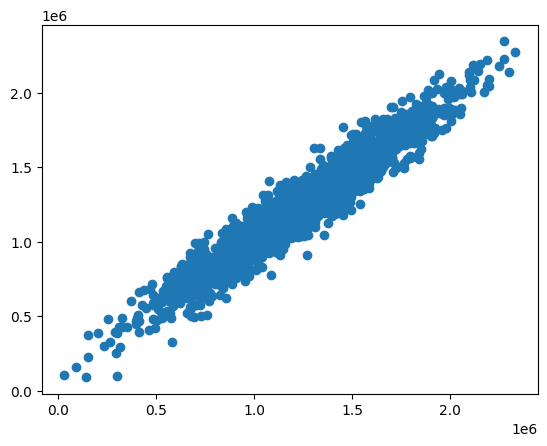

In [46]:
predictions = lm.predict(x_test)
plt.scatter(y_test, predictions)

<ipython-input-49-de7e1dc88d3e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions, bins = 50)


<Axes: xlabel='Price', ylabel='Density'>

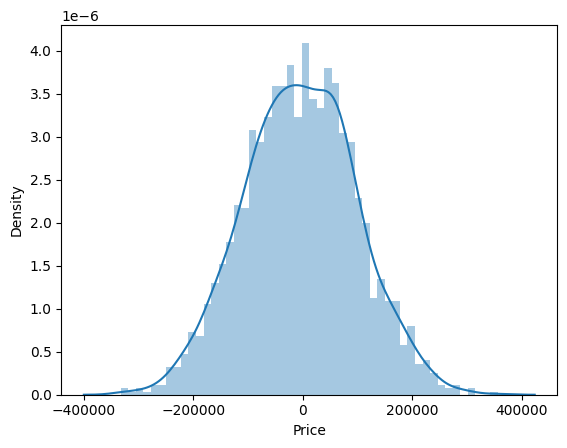

In [49]:
sns.distplot(y_test - predictions, bins = 50)

In [47]:
from sklearn import metrics

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914942
MSE: 10460958907.208977
RMSE: 102278.82922290897
